In [2]:
#Import Library yang dibutuhkan
from datetime import datetime
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [3]:
#Baca Dataset Excel
df=pd.read_excel("dataset.xlsx")
df.head()

,Pengirim,Layanan,Sumber,Biaya,Status
0,17,1,7,374962,8
1,62,1,7,211860,8
2,31,1,7,174982,5
3,15,2,6,110000,8
4,123,2,6,105000,5


In [4]:
#Melihat Tipe Data Setiap Atribut
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pengirim  2926 non-null   int64
 1   Layanan   2926 non-null   int64
 2   Sumber    2926 non-null   int64
 3   Biaya     2926 non-null   int64
 4   Status    2926 non-null   int64
dtypes: int64(5)
memory usage: 114.4 KB


In [5]:
#Mengetahui dimensi DataFrame 'df', yaitu jumlah baris dan kolom. 
df.shape 

(2926, 5)

In [6]:
#Mengecek Apakah Ada Atribut yang Kodong Datanya
df.isnull().sum() 

Pengirim    0
Layanan     0
Sumber      0
Biaya       0
Status      0
dtype: int64

In [35]:
#Baris ini menghapus baris-baris yang memiliki nilai yang hilang (NaN) dari DataFrame 'df'
df.dropna(inplace =True) 

<Axes: xlabel='Jumlah', ylabel='Pengirim'>

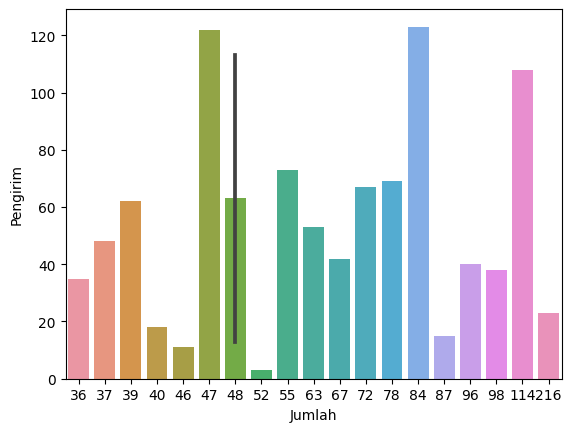

In [7]:
#Membuat grafik Plotting 10 Pengirim terbanyak
plt_pengirim=df.Pengirim.value_counts()[0:20]
plt_pengirim=pd.DataFrame(plt_pengirim) 
plt_pengirim.columns=['Jumlah'] 
sns.barplot(data=plt_pengirim,y=plt_pengirim.index,x=plt_pengirim['Jumlah'])

In [8]:
#Menghapus nilai negatif
df.drop(df[df['Biaya'] < 0].index, inplace = True) 
df.drop(df[df['Status'] < 0].index, inplace = True) 
df[df['Biaya']<0].shape[0], df[df['Status']<0].shape[0] 

(0, 0)

In [9]:
#Menampilkan lima baris pertama dari DataFrame 'df'
df.head()

,Pengirim,Layanan,Sumber,Biaya,Status
0,17,1,7,374962,8
1,62,1,7,211860,8
2,31,1,7,174982,5
3,15,2,6,110000,8
4,123,2,6,105000,5


In [34]:
#Untuk Menghitung jumlah pengiriman dan statusnya.
df['Status']=df['Status']
lt = df.groupby(['Pengirim'])['Status'].max().reset_index()
lt.head(20) 

,Pengirim,Status
0,1,8
1,2,9
2,3,9
3,4,9
4,5,9
5,6,9
6,7,9
7,8,9
8,9,9
9,10,9


In [35]:
#Untuk Menghitung jumlah frekuensi pengiriman.
df['Frequency']= df['Pengirim']
nt=df.groupby('Pengirim')['Frequency'].sum().reset_index()
nt.head(20) 

,Pengirim,Frequency
0,1,6
1,2,30
2,3,156
3,4,20
4,5,50
5,6,78
6,7,56
7,8,72
8,9,198
9,10,180


In [36]:
#Untuk Menghitung jumlah pengiriman dan biayanya.
df['TotalAmount']= df['Pengirim']*df['Biaya'] 
tm=df.groupby('Pengirim')['TotalAmount'].sum().reset_index()
tm.head(20) 

,Pengirim,TotalAmount
0,1,30795
1,2,694986
2,3,3073332
3,4,682112
4,5,1413100
5,6,2253900
6,7,503265
7,8,1245600
8,9,3119229
9,10,4191530


In [37]:
#Menggabungkan Hasil dari Perhitungan Status, Frekuensi, Monetery per pengirim
merge1= pd.merge(lt, nt, how='inner', on='Pengirim') 
new_df=pd.merge(merge1,tm,how='inner',on= 'Pengirim') 
new_df.head(20) 

,Pengirim,Status,Frequency,TotalAmount
0,1,8,6,30795
1,2,9,30,694986
2,3,9,156,3073332
3,4,9,20,682112
4,5,9,50,1413100
5,6,9,78,2253900
6,7,9,56,503265
7,8,9,72,1245600
8,9,9,198,3119229
9,10,9,180,4191530


In [38]:
#Memilih hanya kolom-kolom dengan tipe data numerik
numeric_columns = new_df.select_dtypes(include=[np.number])
epsilon = 1e-8 
data_log = np.log(numeric_columns + epsilon) 
scaler = StandardScaler() 
scaler.fit(data_log) 
data_normalized = scaler.transform(data_log)
scaled = data_normalized

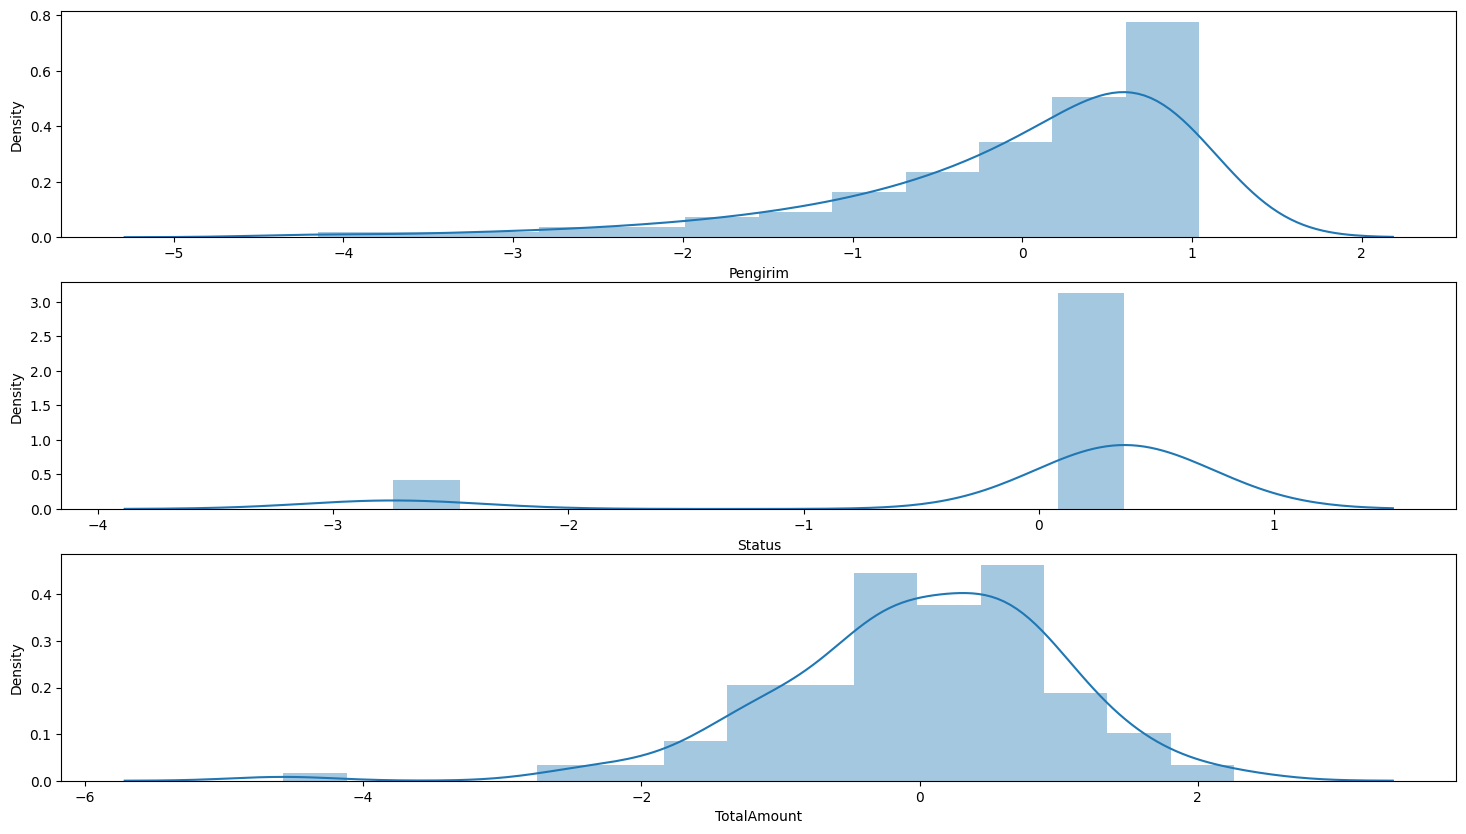

In [39]:
#Membuat DataFrame baru, data_norm, yang berisi data yang telah dinormalisasi.
data_norm = pd.DataFrame(data=data_normalized, index=numeric_columns.index, columns=numeric_columns.columns) 
plt.figure(figsize=(18, 10)) 
plt.subplot(3, 1, 1); sns.distplot(data_norm['Pengirim']) 
plt.subplot(3, 1, 2); sns.distplot(data_norm['Status']) 
plt.subplot(3, 1, 3); sns.distplot(data_norm['TotalAmount']) 
plt.show()

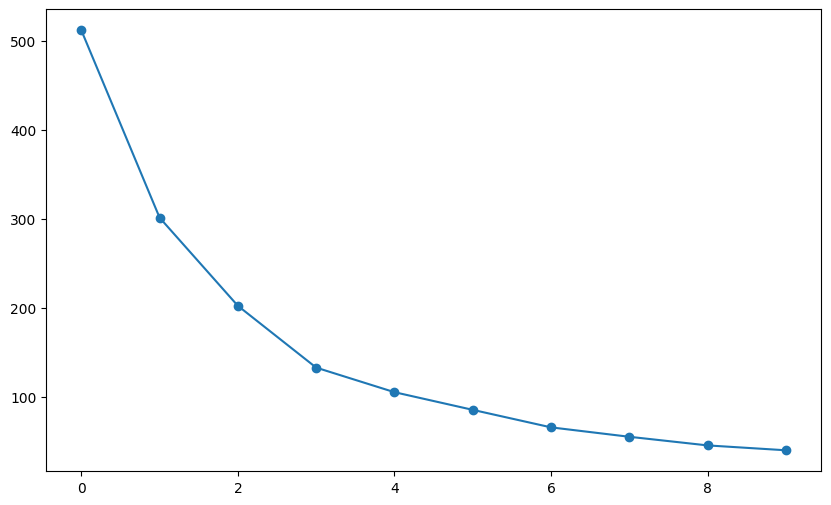

In [40]:
#Implementing Metode Elbow
inertia = []
max_clusters = min(len(scaled), 10) 
for i in np.arange(1, max_clusters + 1) :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled) 
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,6)) 
plt.plot(inertia, marker="o")

In [41]:
#Implementasi Algoritma K-Means
kmeans=KMeans(n_clusters=3) 
kmeans.fit(scaled) 
new_df["Clusters"]=(kmeans.labels_+1) 
new_df.head(20) 

,Pengirim,Status,Frequency,TotalAmount,Clusters
0,1,8,6,30795,3
1,2,9,30,694986,3
2,3,9,156,3073332,3
3,4,9,20,682112,3
4,5,9,50,1413100,3
5,6,9,78,2253900,3
6,7,9,56,503265,3
7,8,9,72,1245600,3
8,9,9,198,3119229,3
9,10,9,180,4191530,3


In [42]:
#Hasil Analisis dan Visualisasi
cluster_average=new_df.groupby('Clusters')[['TotalAmount']].mean()
cluster_average

,TotalAmount
Clusters,
1,4.384146e+07
2,1.567098e+07
3,4.508091e+06


In [47]:
#Pengelompokan Hasil CLuster ke Tabel
def func(row): 
    if row["Clusters"]==1:
        return 'Pengirim dengan Status Aman'
    elif row["Clusters"]==2:
        return 'Pengirim dengan Kemungkinan Beresiko'
    else:
        return 'Pengirim dengan Status Normal'
new_df['group']=new_df.apply(func, axis=1) 
new_df.head(20) 

,Pengirim,Status,Frequency,TotalAmount,Clusters,group
0,1,8,6,30795,3,Pengirim dengan Status Normal
1,2,9,30,694986,3,Pengirim dengan Status Normal
2,3,9,156,3073332,3,Pengirim dengan Status Normal
3,4,9,20,682112,3,Pengirim dengan Status Normal
4,5,9,50,1413100,3,Pengirim dengan Status Normal
5,6,9,78,2253900,3,Pengirim dengan Status Normal
6,7,9,56,503265,3,Pengirim dengan Status Normal
7,8,9,72,1245600,3,Pengirim dengan Status Normal
8,9,9,198,3119229,3,Pengirim dengan Status Normal
9,10,9,180,4191530,3,Pengirim dengan Status Normal


<Axes: ylabel='group'>

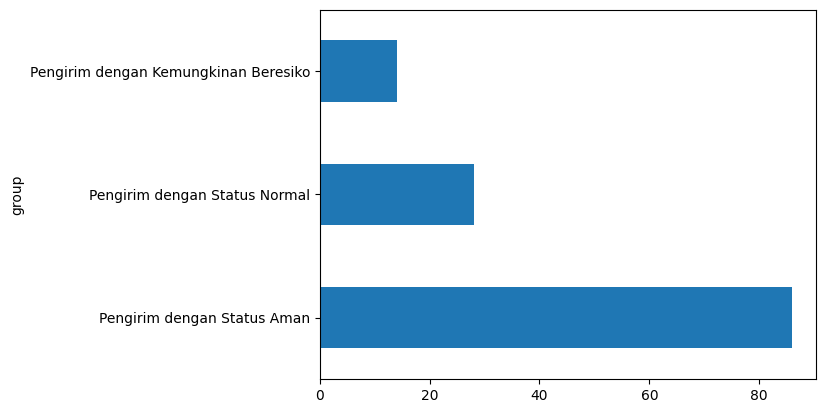

In [48]:
result=new_df.group.value_counts()  
result.plot(kind="barh")

In [45]:
new_df.to_excel('Hasil Cluster Analisis Pengiriman Package.xlsx', index=False)